In [194]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [195]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
#train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
#               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
#              axis=1, inplace=True)
#train_df.drop(['customer_id', 'product_parent', 'cust_review_count',
#               'cust_star_rating_mean', 'cust_star_rating_std', 'prod_review_count',
#               'prod_star_rating_mean', 'prod_star_rating_std'], 
#              axis=1, inplace=True)
train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,1617361,849246716,1,5,5.000000,0.000000,0.200000,0.447214,0.000000,0.000000,...,0.186957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,0.400000,0.894427,0.400000,0.894427,...,-0.028547,0.172017,0.084518,0.194290,0.002472,0.006273,0.052950,0.344210,0.307019,0.363920
2,15679577,849246716,1,8,3.375000,1.505941,7.625000,19.175412,6.500000,17.188036,...,0.044000,0.371702,0.000015,0.316641,0.156807,0.052990,0.165214,0.011699,-0.066285,-0.171195
3,16367779,849246716,1,9,4.444444,0.527046,0.888889,1.364225,0.777778,1.092906,...,-0.171195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,0.235294,0.437237,0.176471,0.392953,...,0.249734,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [196]:
train_df.columns

Index(['customer_id', 'product_parent', 'positive', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std',
       'cust_total_votes_mean', 'cust_total_votes_std',
       'cust_helpful_votes_mean', 'cust_helpful_votes_std',
       'prod_review_count', 'prod_star_rating_mean', 'prod_star_rating_std',
       'prod_total_votes_mean', 'prod_total_votes_std',
       'prod_helpful_votes_mean', 'prod_helpful_votes_std', 'pos_sim',
       'neg_sim', 'pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3',
       'pos_2_word_1', 'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1',
       'pos_3_word_2', 'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2',
       'neg_1_word_3', 'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3',
       'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3'],
      dtype='object')

In [197]:
train_df.groupby('positive').size()

positive
0     9531
1    38191
dtype: int64

In [198]:
temp = train_df[train_df.positive == 0]
temp = pd.concat([temp, train_df[train_df.positive == 1][:9531]])
train_df = temp

In [199]:
train_df.groupby('positive').size() / len(train_df)

positive
0    0.5
1    0.5
dtype: float64

In [200]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
#test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
#               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
#              axis=1, inplace=True)
#test_df.drop(['customer_id', 'product_parent', 'cust_review_count',
#               'cust_star_rating_mean', 'cust_star_rating_std', 'prod_review_count',
#               'prod_star_rating_mean', 'prod_star_rating_std'], 
#              axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,pos_3_word_3,neg_1_word_1,neg_1_word_2,neg_1_word_3,neg_2_word_1,neg_2_word_2,neg_2_word_3,neg_3_word_1,neg_3_word_2,neg_3_word_3
0,36330222,986428010,1,24,4.291667,1.267629,0.541667,1.250362,0.333333,1.049500,...,0.001941,0.000987,-0.015594,-0.013630,0.006534,0.007653,0.023873,-0.029103,-0.046843,-0.041810
1,24360083,986428010,1,23,4.347826,1.191206,1.434783,2.191431,1.000000,1.537412,...,0.901494,-0.222196,-0.196039,-0.217517,0.918800,0.925143,0.901494,0.919331,0.902017,1.000000
2,28891040,437083384,1,10,4.500000,0.707107,0.000000,0.000000,0.000000,0.000000,...,0.092532,0.313854,0.086877,0.315884,0.196752,0.052950,0.194290,0.054040,0.014332,-0.002904
3,52449052,437083384,0,5,3.400000,1.516575,11.800000,20.789420,10.400000,18.187908,...,0.187860,0.083284,-0.115922,0.023810,0.090283,-0.083403,0.025464,0.084633,-0.092710,0.019767
4,27192976,437083384,1,6,4.666667,0.816497,0.500000,1.224745,0.000000,0.000000,...,0.126235,-0.083963,0.036128,-0.155615,-0.020984,0.021015,-0.042505,0.059809,-0.017769,-0.064662


In [201]:
test_df.groupby('positive').size()

positive
0     3573
1    12262
dtype: int64

In [202]:
temp = test_df[test_df.positive == 0]
temp = pd.concat([temp, test_df[test_df.positive == 1][:3573]])
test_df = temp

In [203]:
test_df.groupby('positive').size() / len(test_df)

positive
0    0.5
1    0.5
dtype: float64

In [204]:
len(test_df.query('positive == 1')) / len(test_df)

0.5

In [205]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']

In [206]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [207]:
gb.score(test_x, test_y)

0.7169045619927232

In [208]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [209]:
rf.score(test_x, test_y)

0.6991323817520291

<BarContainer object of 36 artists>

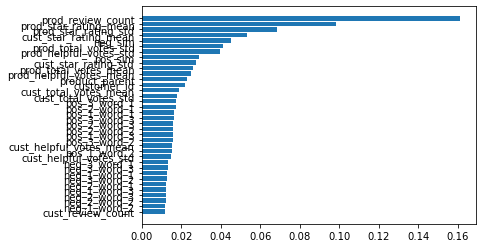

In [210]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [212]:
knn.score(test_x, test_y)

0.5281276238455079

In [213]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [214]:
gnb.score(test_x, test_y)

0.5566750629722922

In [215]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = gnb.predict(test_x)
for i in range(len(preds)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] == test_y.iloc[i]):
        star_cor += 1
    if (preds[i] > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 3978 0.5566750629722922
Pos: 2497 0.34942625244892245
Star Correct: 3978 0.5566750629722922
True Positive: 1451 0.20305065771060735
True Negative: 2527 0.35362440526168487
False Positive: 1046 0.14637559473831513
False Negative: 2122 0.2969493422893927


In [221]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np
import matplotlib.pyplot as plt

In [222]:
keras.backend.clear_session()

In [223]:
np.shape(train_x)

(19062, 36)

In [224]:
network = models.Sequential()
network.add(layers.Dense(20, activation='relu', input_shape=(36,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(20, activation='relu', input_shape=(20,)))
network.add(layers.Dense(20, activation='relu', input_shape=(20,)))
network.add(layers.Dense(20, activation='relu', input_shape=(20,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(20, activation='relu', input_shape=(20,)))
network.add(layers.Dense(20, activation='relu', input_shape=(20,)))
network.add(layers.Dense(10, activation='relu', input_shape=(20,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='relu', input_shape=(20,)))
network.add(layers.Dense(10, activation='relu', input_shape=(20,)))
network.add(layers.Dense(10, activation='relu', input_shape=(20,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='relu', input_shape=(20,)))
network.add(layers.Dense(10, activation='relu', input_shape=(20,)))
network.add(layers.Dense(5, activation='relu', input_shape=(10,)))
network.add(layers.Dense(5, activation='relu', input_shape=(10,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(5,)))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                740       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)               

In [225]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 500
history = network.fit(train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_x, test_y))

Train on 19062 samples, validate on 7146 samples
Epoch 1/500
19062/19062 [==============================] - 3s 149us/step - loss: 275777.7578 - accuracy: 0.5002 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 2/500
19062/19062 [==============================] - 1s 55us/step - loss: 149.9443 - accuracy: 0.5023 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/500
19062/19062 [==============================] - 1s 50us/step - loss: 7.2971 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/500
19062/19062 [==============================] - 1s 47us/step - loss: 1.7840 - accuracy: 0.4976 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/500
19062/19062 [==============================] - 1s 45us/step - loss: 1.0485 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/500
19062/19062 [==============================] - 1s 48us/step - loss: 0.7059 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/500
19062/19062 [==============================

19062/19062 [==============================] - 1s 50us/step - loss: 0.6932 - accuracy: 0.4931 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 56/500
19062/19062 [==============================] - 1s 48us/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 57/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 58/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 59/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 60/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 61/500
19062/19062 [==============================] - 1s 49us/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 

19062/19062 [==============================] - 1s 53us/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 111/500
19062/19062 [==============================] - 1s 48us/step - loss: 0.6932 - accuracy: 0.4984 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 112/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 113/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 114/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 115/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.4923 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 116/500
19062/19062 [==============================] - 1s 52us/step - loss: 0.6932 - accuracy: 0.4950 - val_

19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 165/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 166/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 167/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 168/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 169/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 170/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4977 - val_

Epoch 219/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 220/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4970 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 221/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4955 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 222/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 223/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 224/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 225/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy:

19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 274/500
19062/19062 [==============================] - 1s 47us/step - loss: 0.6932 - accuracy: 0.4971 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 275/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 276/500
19062/19062 [==============================] - 1s 48us/step - loss: 0.6932 - accuracy: 0.4940 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 277/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.4944 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 278/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4909 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 279/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4988 - val_

Epoch 328/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 329/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 330/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 331/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 332/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 333/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4937 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 334/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy:

19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4999 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 383/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 384/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4951 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 385/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 386/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 387/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 388/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6931 - accuracy: 0.4967 - val_

Epoch 437/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.4982 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 438/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 439/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6931 - accuracy: 0.5018 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 440/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 441/500
19062/19062 [==============================] - 1s 44us/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 442/500
19062/19062 [==============================] - 1s 48us/step - loss: 0.6932 - accuracy: 0.4956 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 443/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy:

19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4912 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 492/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 493/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 494/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 495/500
19062/19062 [==============================] - 1s 45us/step - loss: 0.6931 - accuracy: 0.4966 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 496/500
19062/19062 [==============================] - 1s 43us/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 497/500
19062/19062 [==============================] - 1s 46us/step - loss: 0.6932 - accuracy: 0.4985 - val_

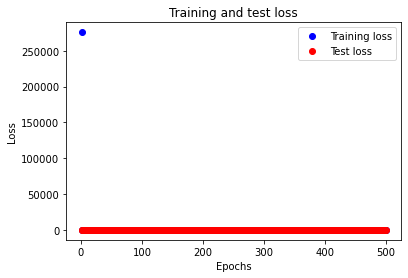

In [226]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

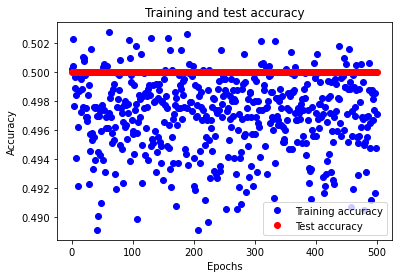

In [227]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [228]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = network.predict(test_x)
for i in range(len(preds)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] == test_y.iloc[i]):
        star_cor += 1
    if (preds[i] > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 3573 0.5
Pos: 7146 1.0
Star Correct: 0 0.0
True Positive: 3573 0.5
True Negative: 0 0.0
False Positive: 3573 0.5
False Negative: 0 0.0


In [229]:
#network.save('basic_neural_net3.h5')